<a href="https://colab.research.google.com/github/nooyeat/kaggle/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taetoon","key":"036d8e9969c615f0f7074032c6f2516e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 58.4MB/s]


In [ ]:
!unzip /content/spaceship-titanic.zip

Archive:  /content/spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


PassengerId : 승객 ID

HomePlanet : 출발 행성(거주지)

CryoSleep : 취침 방식 여부

Cabin : 객실 종류 및 번호 (port : 좌현,starboard : 우현)

Destination : 목적지

Age : 승객의 나이

VIP : 승객의 VIP 서비스 유무

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액

Name : 이름

Transported : 도착 여부

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_data.shape

(8693, 14)

In [ ]:
test_data=pd.read_csv('test.csv')
test_data.shape

(4277, 13)

train_data: (8693, 14), test_data: (4277, 13)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_data.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


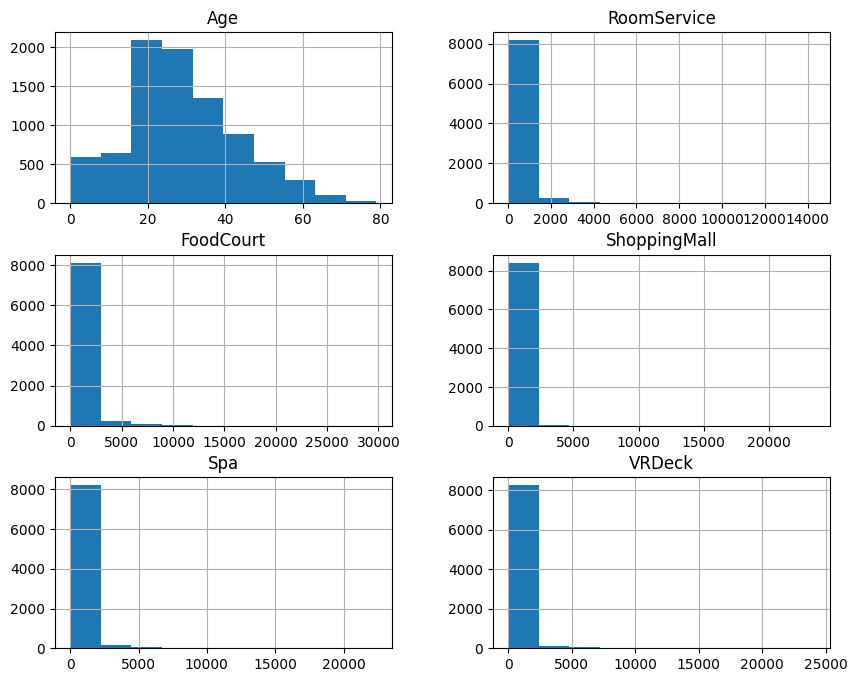

In [ ]:
train_data.hist(figsize=(10,8))
plt.show()

In [ ]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


범주: HomePlanet,
불리안: CryoSleep

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# 범주형 데이터에 대한 NaN 처리
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])
train_data['Name'] = train_data['Name'].fillna('Unknown')

# 수치형 데이터에 대한 NaN 처리
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].median())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].median())
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].median())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].median())


In [ ]:
cabin=train_data['Cabin'].apply(lambda x: x.split('/'))

train_data['Cabin1']=cabin.apply(lambda x: x[0])
train_data['Cabin2']=cabin.apply(lambda x: float(x[1]))
train_data['Cabin3']=cabin.apply(lambda x: x[2])

In [ ]:
train_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [ ]:
train_data.head() # cry, vip

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2,Cabin3
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S


In [ ]:
train_data['CryoSleep']=train_data['CryoSleep'].astype(int)
train_data['VIP']=train_data['VIP'].astype(int)
train_data['Tranported']=train_data['Transported'].astype(int)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin1        8693 non-null   object 
 12  Cabin2        8693 non-null   float64
 13  Cabin3        8693 non-null   object 
 14  Tranported    8693 non-null   int64  
dtypes: bool(1), float64(7), int64(3), object(4)
memory usage: 959.4+ KB


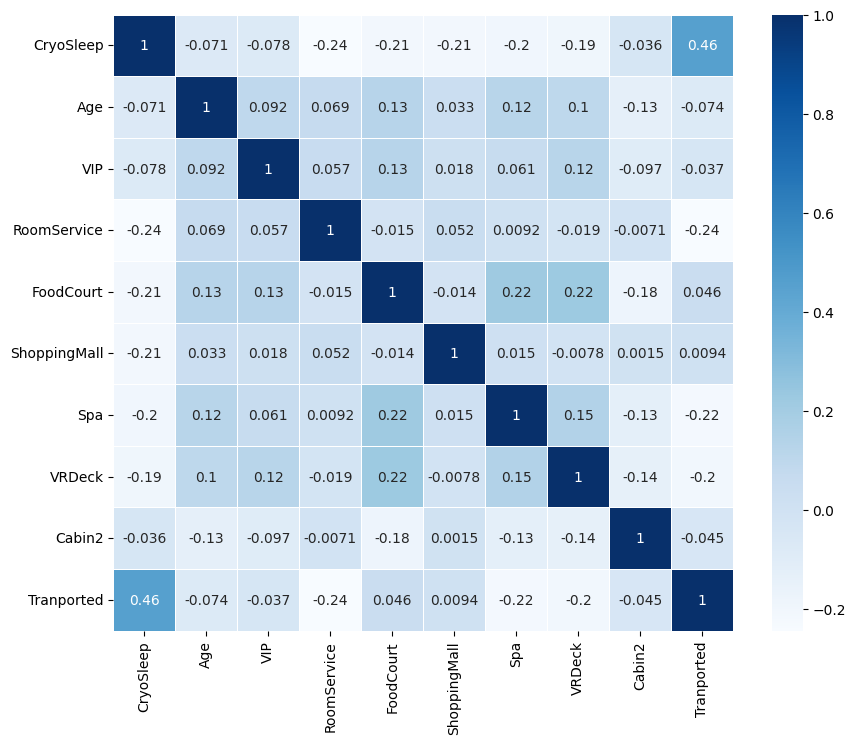

In [ ]:
num_feat=train_data.select_dtypes(include=['int64', 'float64'])
corr_matrix=num_feat.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.show()

원핫인코딩을 이용해 범주형 데이터-> 수치형

In [ ]:
encoding_df=pd.get_dummies(train_data)
encoding_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin2,...,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin3_P,Cabin3_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0.0,...,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,98.0,...,True,False,False,False,False,False,False,False,True,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1499.0,...,False,False,False,False,False,False,True,False,False,True
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1500.0,...,False,False,False,False,False,False,True,False,False,True
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,608.0,...,False,False,False,False,True,False,False,False,False,True


변수가 너무 많아져서 PCA 사용해야할듯

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca_df=pca.fit_transform(encoding_df)
col=['pca'+str(i) for i in range(10)]

pca_df=pd.DataFrame(pca_df, columns=col)
pca_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-535.341597,-188.714099,-27.402243,-245.542401,-117.236901,-653.549510,9.882562,-0.891248,-0.542254,-0.356104
1,-364.459561,174.658375,351.457526,-144.056816,-124.735189,-625.822325,-5.914332,0.225334,0.584108,-0.583681
2,4601.931300,2538.931834,4854.954629,-308.596998,-180.206158,-199.073762,19.218301,0.069011,0.631003,-0.358563
3,1609.037472,1476.550696,2291.396644,-211.097388,214.339593,-444.473421,-0.913946,-0.049307,0.635058,-0.571339
4,-318.081800,132.973056,397.172634,73.585739,-48.130211,-620.137350,-14.318920,0.272328,0.570130,-0.561764
...,...,...,...,...,...,...,...,...,...,...
8688,6177.764467,-1848.039546,1045.851552,-222.926585,-92.463317,-162.508424,5.448862,-0.935583,-0.491692,0.252158
8689,-638.376245,-249.958211,-24.085157,-272.003684,-105.952670,840.422146,-7.051565,0.091077,0.919035,0.757269
8690,-646.566253,-232.940768,6.041787,170.494902,1712.649408,835.555079,-0.405731,0.690849,0.783617,0.609779
8691,1397.579317,1789.264408,-1956.462362,-201.677375,-103.007897,175.840252,1.039712,0.397740,0.445537,-0.119044


In [ ]:
pca_df.shape

(8693, 10)

In [ ]:
from sklearn.model_selection import train_test_split

target=train_data['Tranported']

x_train, x_test, y_train, y_test=train_test_split(pca_df, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model=RandomForestClassifier(n_jobs=-1, random_state=42)

params = { 'n_estimators' : [50, 100, 200, 300, 400],
           'max_depth' : [4, 6, 8, 10, 12, 16],
           'min_samples_leaf' : [4, 8, 12, 16, 20], #과적합 제어
           'min_samples_split' : [4, 8, 12, 16, 20] #과적합 제어
         }
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

random_model = RandomizedSearchCV(
    model, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, random_state=42
)
random_model.fit(x_train, y_train)

print(random_model.best_params_)
print(random_model.best_score_)


{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 12}
0.9876330366332384


In [ ]:
rf_model=RandomForestClassifier(n_estimators=100, min_samples_split=8, min_samples_leaf=4,
                                oob_score=True, max_depth=12)
rf_model.fit(x_train, y_train)

rf_model.predict(x_test)

print('훈련 세트 점수:', rf_model.score(x_train, y_train))
print('테스트 세트 점수:', rf_model.score(x_test, y_test))
print('OOB 점수:', rf_model.oob_score_)

훈련 세트 점수: 0.996836353178027
테스트 세트 점수: 0.9856239217941346
OOB 점수: 0.9874892148403797


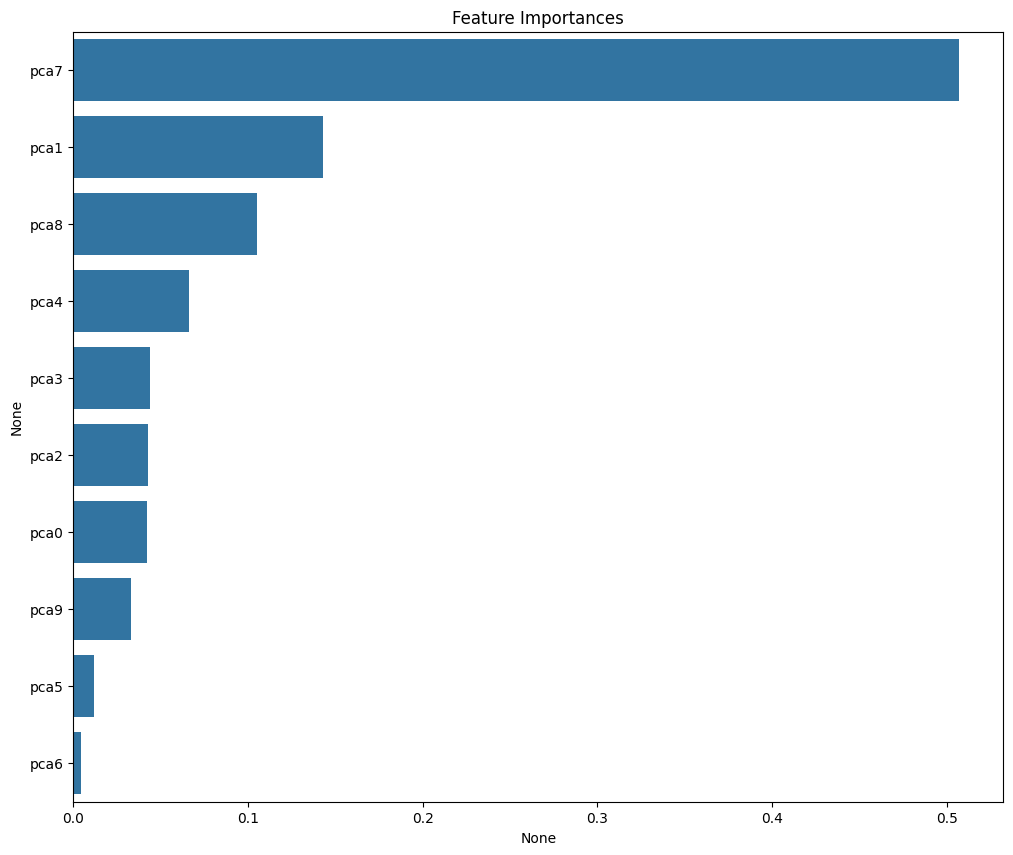

In [ ]:
importances_feat=rf_model.feature_importances_
feat_importance=pd.Series(importances_feat, index=x_train.columns)
sorted_feat=feat_importance.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
sns.barplot(x=sorted_feat, y=sorted_feat.index)
plt.show()

In [ ]:
x_train.shape

(6954, 10)

In [ ]:
test_data=pd.read_csv('test.csv')

In [ ]:
test_data.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
# 범주형 데이터에 대한 NaN 처리
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0])
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])
test_data['VIP'] = test_data['VIP'].fillna(test_data['VIP'].mode()[0])
test_data['Name'] = test_data['Name'].fillna('Unknown')

# 수치형 데이터에 대한 NaN 처리
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['RoomService'] = test_data['RoomService'].fillna(test_data['RoomService'].median())
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(test_data['FoodCourt'].median())
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].median())
test_data['Spa'] = test_data['Spa'].fillna(test_data['Spa'].median())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].median())

In [ ]:
cab = test_data["Cabin"].apply(lambda x: x.split("/"))

test_data["Cab_1"] = cab.apply(lambda x: x[0])
test_data["Cab_3"] = cab.apply(lambda x: x[2])
test_data["Cab_2"] = cab.apply(lambda x: float(x[1]))

test_data.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

test_data["VIP"] = test_data["VIP"].astype(int)
test_data["CryoSleep"] = test_data["CryoSleep"].astype(int)

encoded_test_data = pd.get_dummies(test_data)
test_data = encoded_test_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)

In [ ]:
pca=PCA(n_components=10)
pca_test=pca.fit_transform(encoded_test_data)

pca_col=[]
for i in range(0, 10):
  x='pca'+str(i)
  pca_col.append(x)
pca_df=pd.DataFrame(pca_test, columns=pca_col)
pca_rf = rf_model.predict(pca_df)

sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['Transported'] = pca_rf.astype(bool)
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True
